In [1]:
# Imports
import re
import unicodedata
import nltk
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import prepare_github as prepare
from wordcloud import WordCloud


In [2]:
# Read data into a dataframe
df = pd.read_csv('combined_data_ready.csv')

In [3]:
# Show first few rows
df.head()

repo language  \
0                  imartinez/privateGPT   Python   
1               Gioman101/FlipperAmiibo   Python   
2                         yuzu-emu/yuzu      C++   
3  AUTOMATIC1111/stable-diffusion-webui   Python   
4                     go-skynet/LocalAI       Go   

                                            original  \
0  # privateGPT\nAsk questions to your documents ...   
1  # FlipperAmiibo\nA collection of FlipperZero N...   
2  \n\n\n\n\nyuzu\n\n\nyuzu is the world's most p...   
3  # Stable Diffusion web UI\nA browser interface...   
4  \n\n \n    LocalAI\n\n\n\n[![tests](https://gi...   

                                               clean  \
0  privategpt ask questions documents without int...   
1  flipperamiibo collection flipperzero nfc files...   
2  yuzu yuzu worlds popular opensource nintendo s...   
3  stable diffusion web ui browser interface base...   
4  localai testshttpsgithubcomgoskynetlocalaiacti...   

                                             stemmed  \
0  privategpt ask question document without inter...   
1  flipperamiibo collect flipperzero nfc file emu...   
2  yuzu yuzu world popular opensourc nintendo swi...   
3  stabl diffus web ui browser interfac base grad...   
4  localai testshttpsgithubcomgoskynetlocalaiacti...   

                                          lemmatized  
0  privategpt ask question document without inter...  
1  flipperamiibo collection flipperzero nfc file ...  
2  yuzu yuzu worlds popular opensource nintendo s...  
3  stable diffusion web ui browser interface base...  
4  localai testshttpsgithubcomgoskynetlocalaiacti...

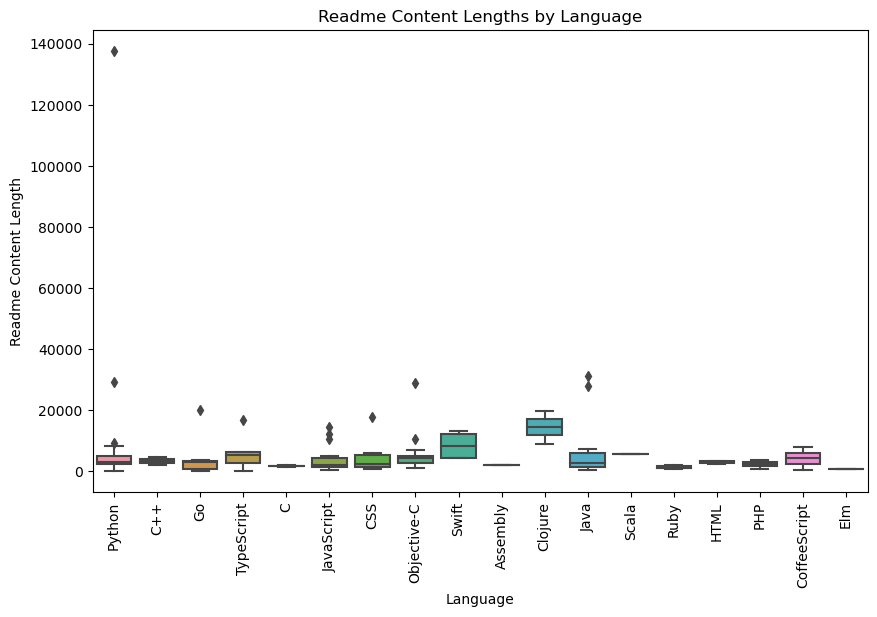

In [4]:
# Add a column for readme content lengths
df['readme_length'] = df['clean'].apply(len)

# Box plot of readme content lengths by language
plt.figure(figsize=(10, 6))
sns.boxplot(x='language', y='readme_length', data=df)
plt.title('Readme Content Lengths by Language')
plt.xlabel('Language')
plt.ylabel('Readme Content Length')
plt.xticks(rotation=90)
plt.show()

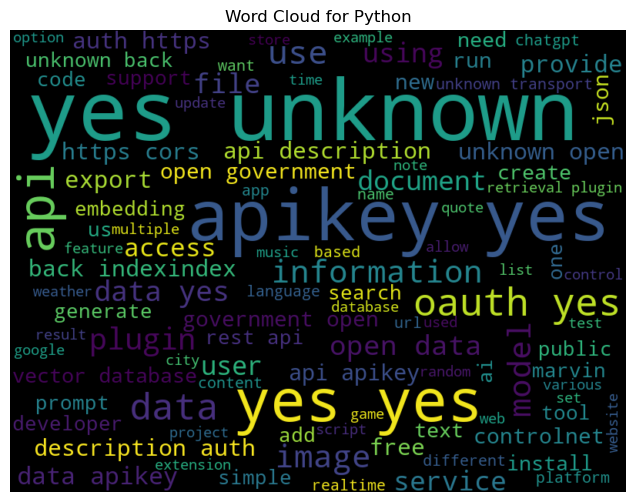

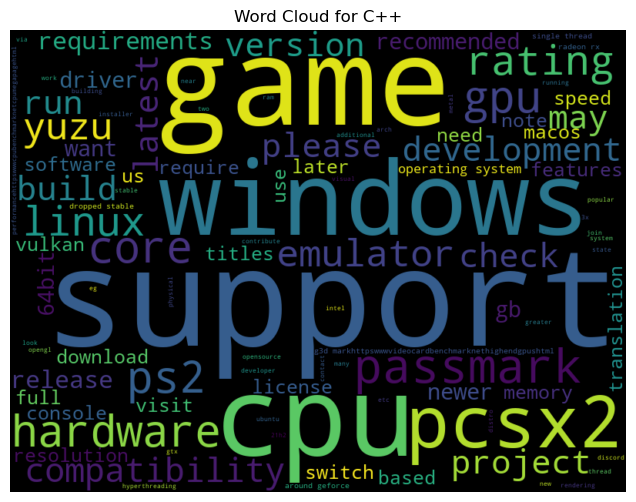

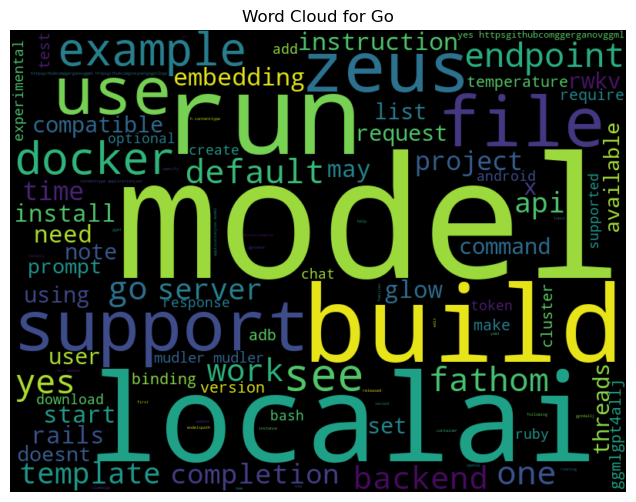

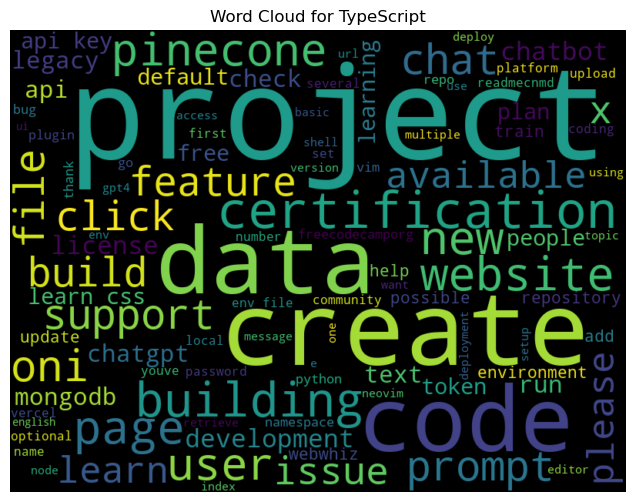

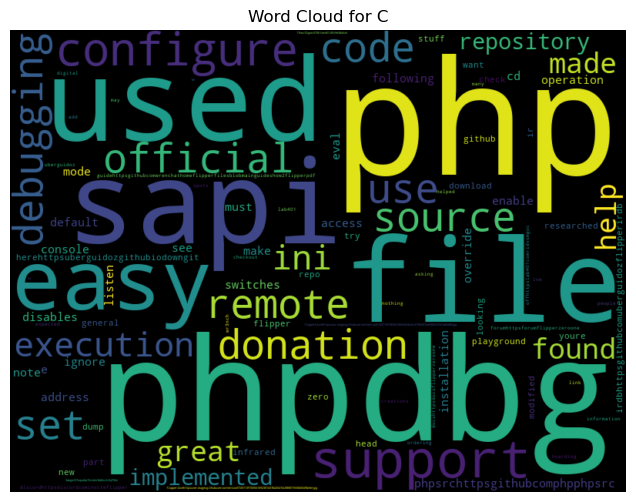

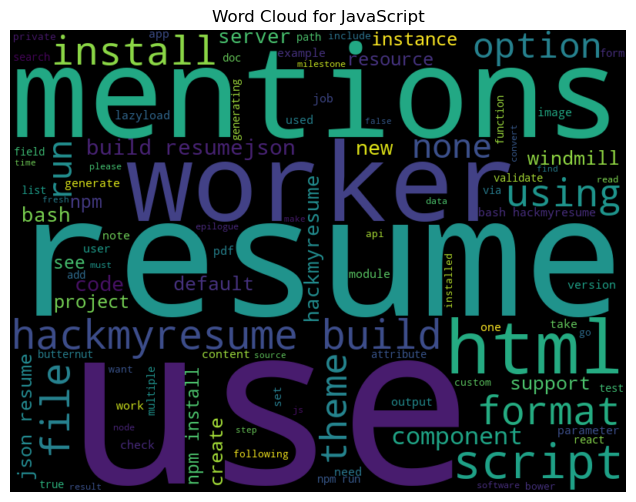

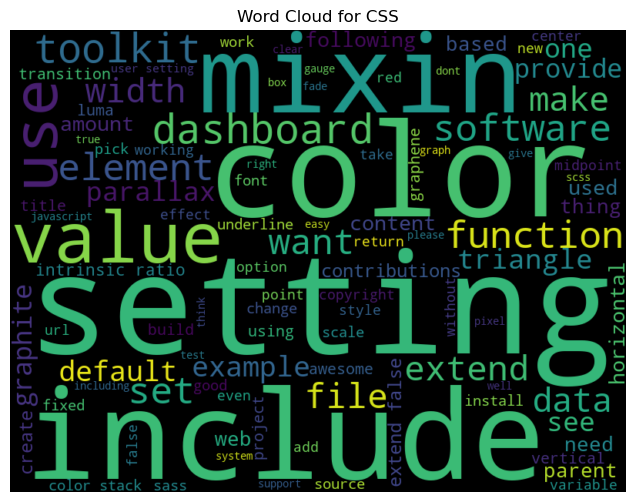

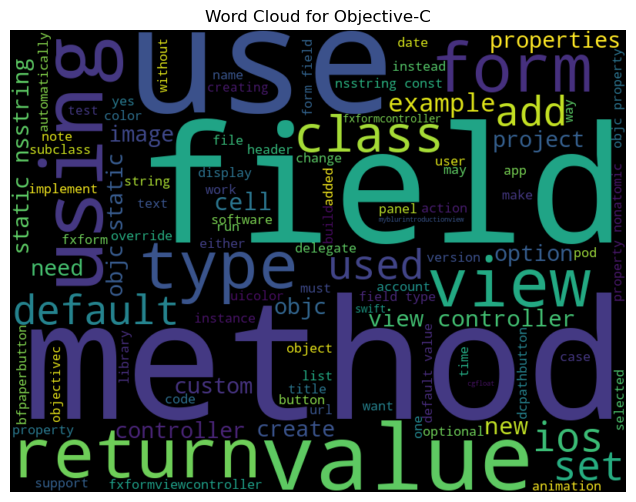

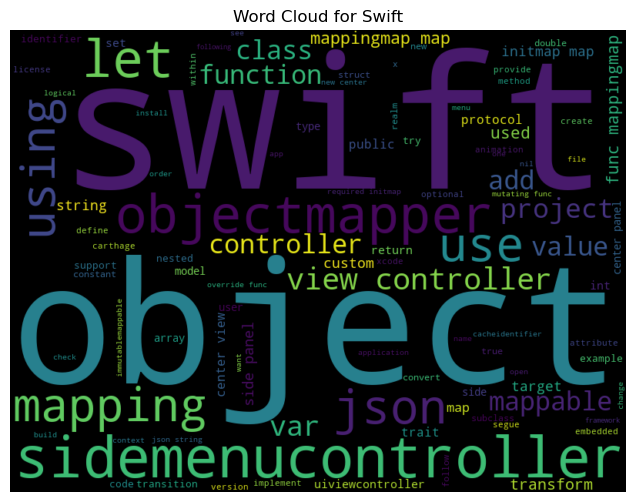

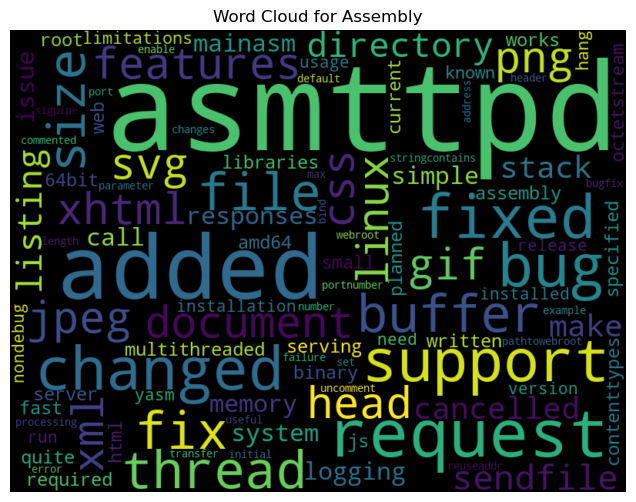

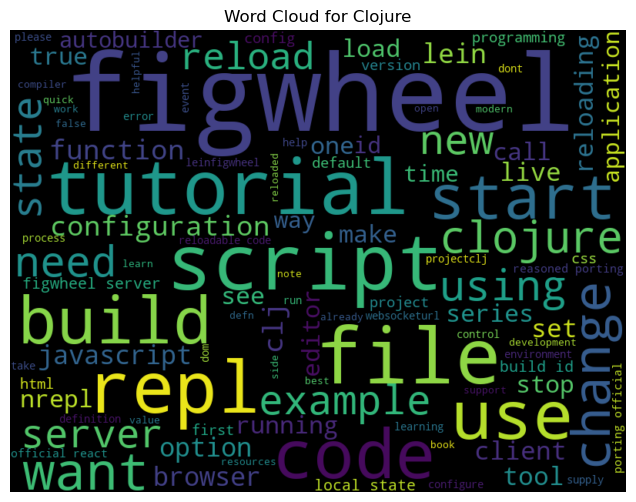

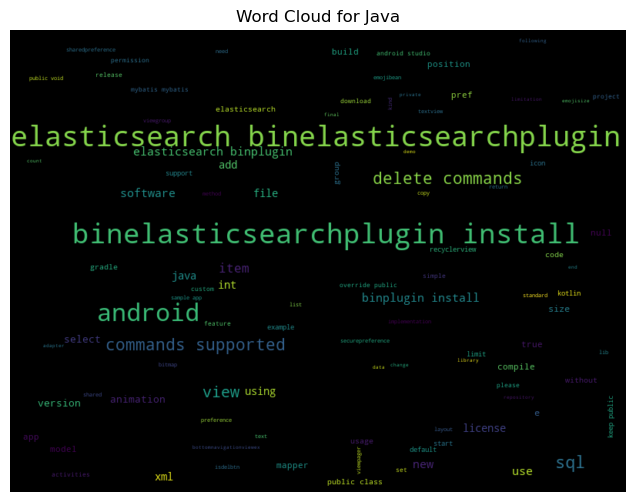

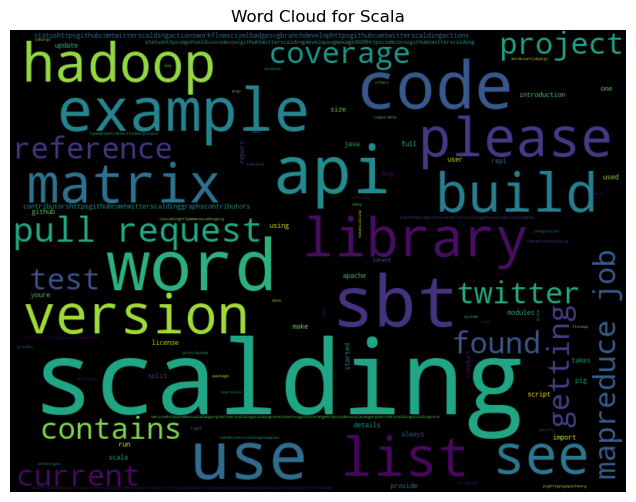

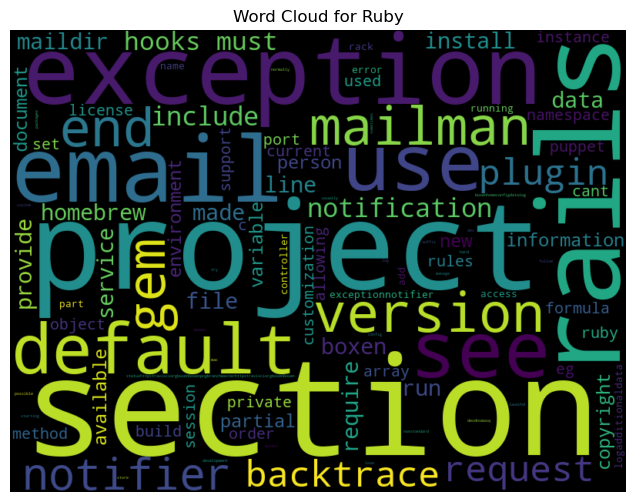

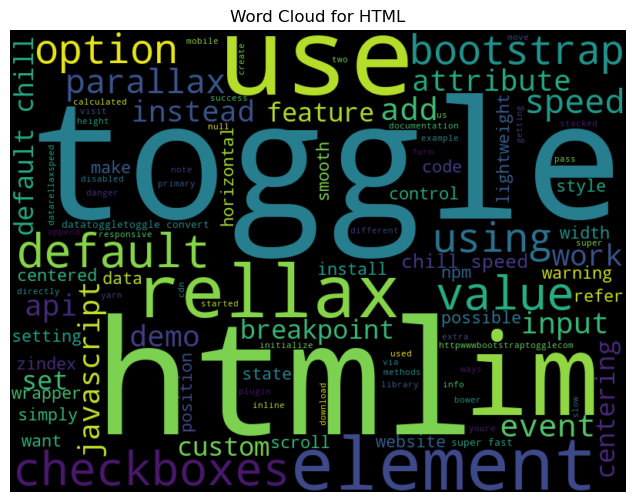

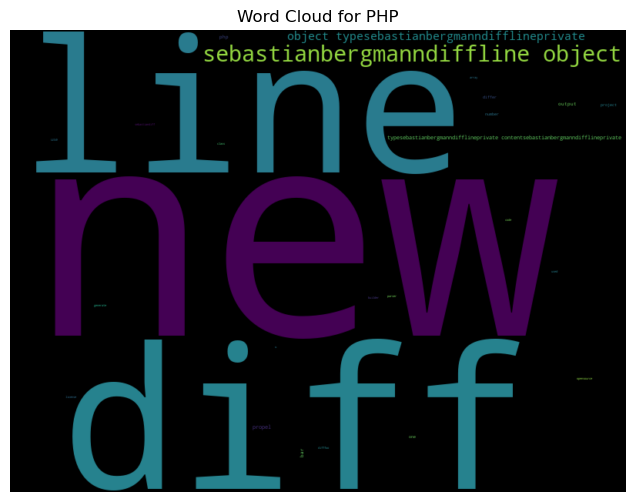

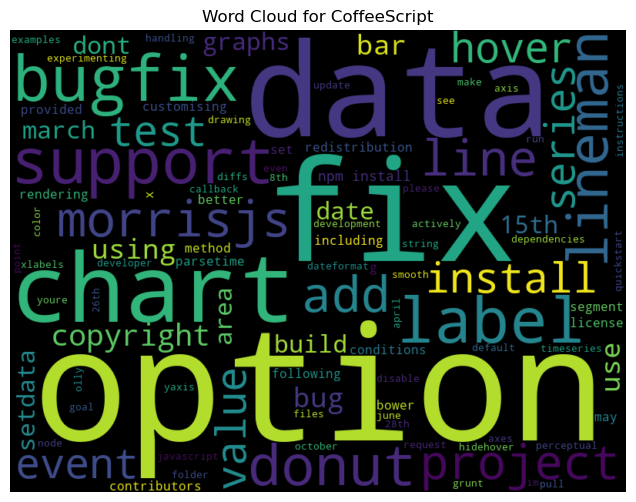

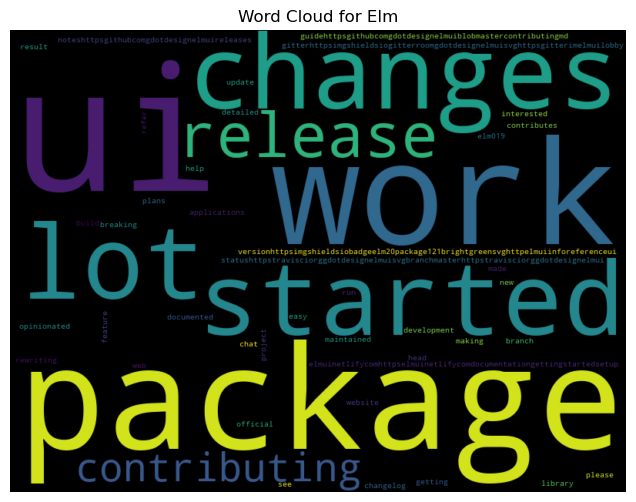

In [5]:
# Create a word cloud for each language
languages = df['language'].unique()
for language in languages:
    plt.figure(figsize=(8, 6))
    subset = df[df['language'] == language]
    text = ' '.join(subset['clean'])
    wordcloud = WordCloud(width=800, height=600, max_words=100).generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {language}')
    plt.axis('off')
    plt.show()


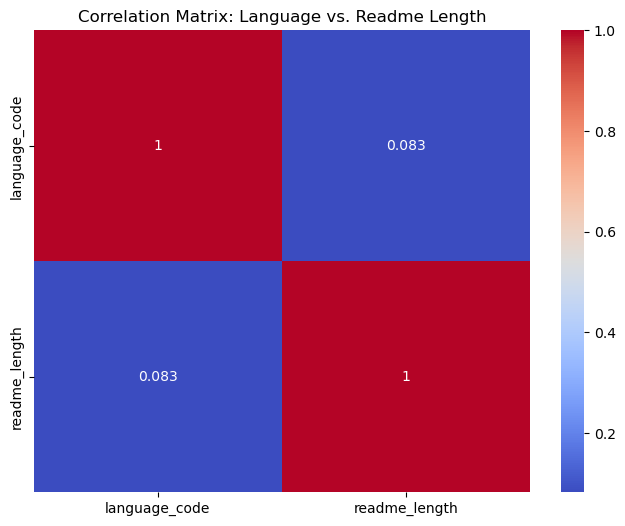

In [6]:
# Convert language labels to numerical values
df['language_code'] = df['language'].astype('category').cat.codes

# Compute correlation matrix
corr_matrix = df[['language_code', 'readme_length']].corr()

# Heatmap of correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix: Language vs. Readme Length')
plt.show()


In [7]:
# Call prepare function 
df = prepare.transform_data(df)

In [8]:
# Verify updated values
df.head()

repo language  \
0                  imartinez/privateGPT   Python   
1               Gioman101/FlipperAmiibo   Python   
2                         yuzu-emu/yuzu      C++   
3  AUTOMATIC1111/stable-diffusion-webui   Python   
4                     go-skynet/LocalAI       Go   

                                            original  \
0  # privateGPT\nAsk questions to your documents ...   
1  # FlipperAmiibo\nA collection of FlipperZero N...   
2  \n\n\n\n\nyuzu\n\n\nyuzu is the world's most p...   
3  # Stable Diffusion web UI\nA browser interface...   
4  \n\n \n    LocalAI\n\n\n\n[![tests](https://gi...   

                                               clean  \
0  privategpt ask questions documents without int...   
1  flipperamiibo collection flipperzero nfc files...   
2  yuzu yuzu worlds popular opensource nintendo s...   
3  stable diffusion web ui browser interface base...   
4  localai testshttpsgithubcomgoskynetlocalaiacti...   

                                             stemmed  \
0  privategpt ask question document without inter...   
1  flipperamiibo collect flipperzero nfc file emu...   
2  yuzu yuzu world popular opensourc nintendo swi...   
3  stabl diffus web ui browser interfac base grad...   
4  localai testshttpsgithubcomgoskynetlocalaiacti...   

                                          lemmatized  readme_length  \
0  privategpt ask question document without inter...           3558   
1  flipperamiibo collection flipperzero nfc file ...            212   
2  yuzu yuzu worlds popular opensource nintendo s...           1981   
3  stable diffusion web ui browser interface base...           8278   
4  localai testshttpsgithubcomgoskynetlocalaiacti...          20136   

   language_code                                          lematized  
0             13  privategpt ask question document without inter...  
1             13  flipperamiibo collection flipperzero nfc file ...  
2              2  yuzu yuzu worlds popular opensource nintendo s...  
3             13  stable diffusion web ui browser interface base...  
4              7  localai testshttpsgithubcomgoskynetlocalaiacti...

In [9]:
# Check the shape of the DataFrame
df.shape

(107, 9)

In [10]:
# Get summary statistics of the DataFrame
df.describe()

readme_length  language_code
count     107.000000     107.000000
mean     6359.252336      10.084112
std     14271.102503       3.880579
min        34.000000       0.000000
25%      1544.500000       9.000000
50%      3297.000000      10.000000
75%      5602.500000      13.000000
max    137575.000000      17.000000

Objective-C     20
Python          17
JavaScript      17
Java            12
Go               7
TypeScript       6
CSS              6
Swift            4
Ruby             3
PHP              2
C                2
C++              2
Clojure          2
CoffeeScript     2
HTML             2
Assembly         1
Scala            1
Elm              1
Name: language, dtype: int64


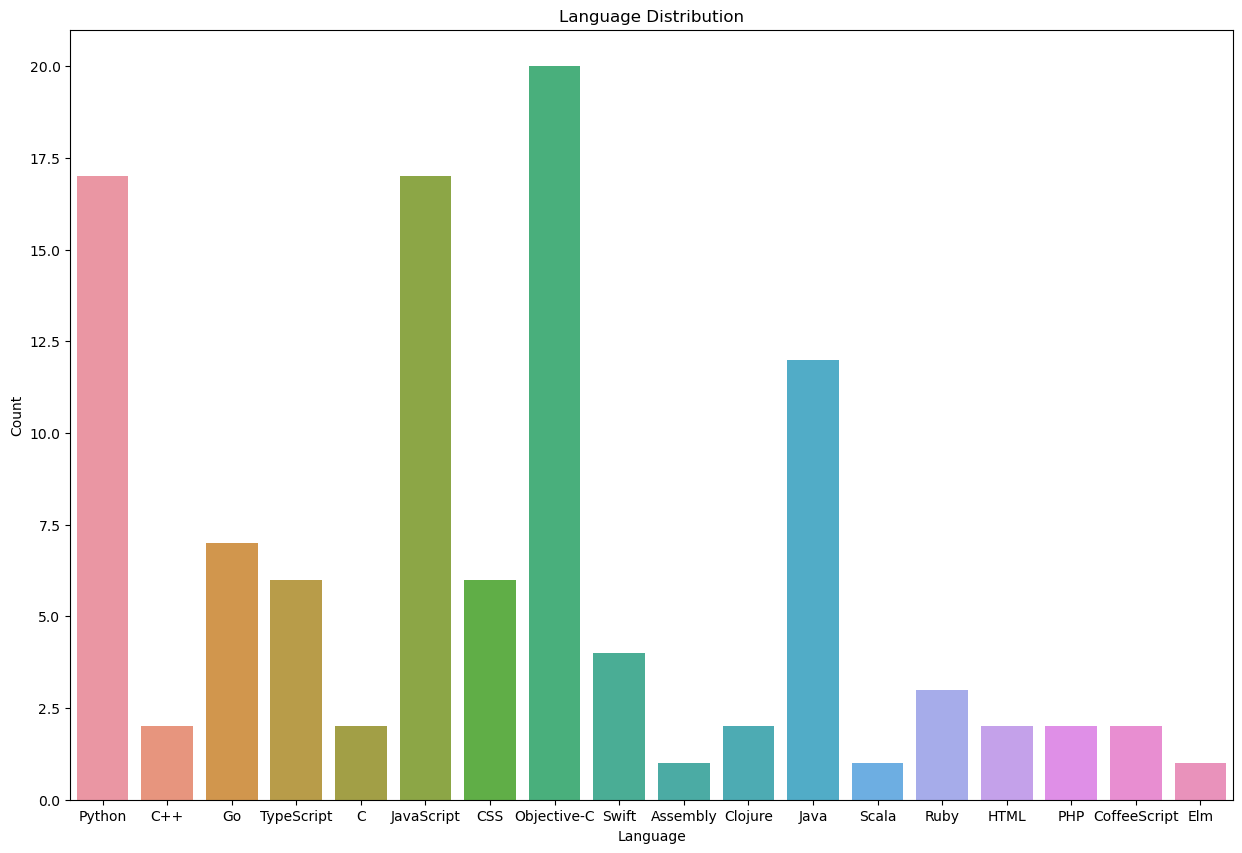

In [11]:
# Count the number of each language
language_counts = df['language'].value_counts()
print(language_counts)

# Language distribution
plt.figure(figsize=(15, 10))
sns.countplot(x='language', data=df)
plt.title('Language Distribution')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()


In [12]:
# Extract the feature and target variables
X = df['stemmed']
y = df['language']

# Create a bag-of-words representation of the text data
vectorizer = CountVectorizer()
X_transformed = vectorizer.fit_transform(X)


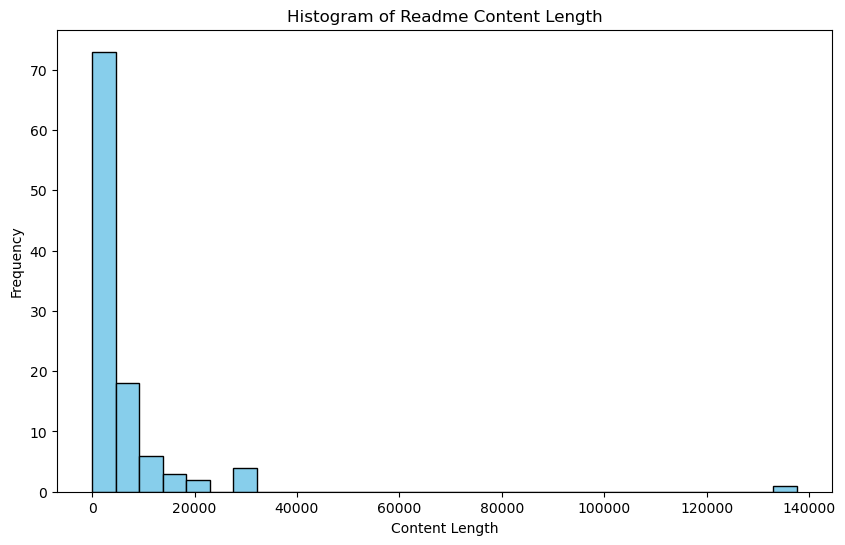

In [13]:
# Calculate the length of each readme content
df['content_length'] = df['clean'].apply(len)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['content_length'], bins=30, color='skyblue', edgecolor='black')

# Customize the plot
plt.title('Histogram of Readme Content Length')
plt.xlabel('Content Length')
plt.ylabel('Frequency')

# Display the plot
plt.show()


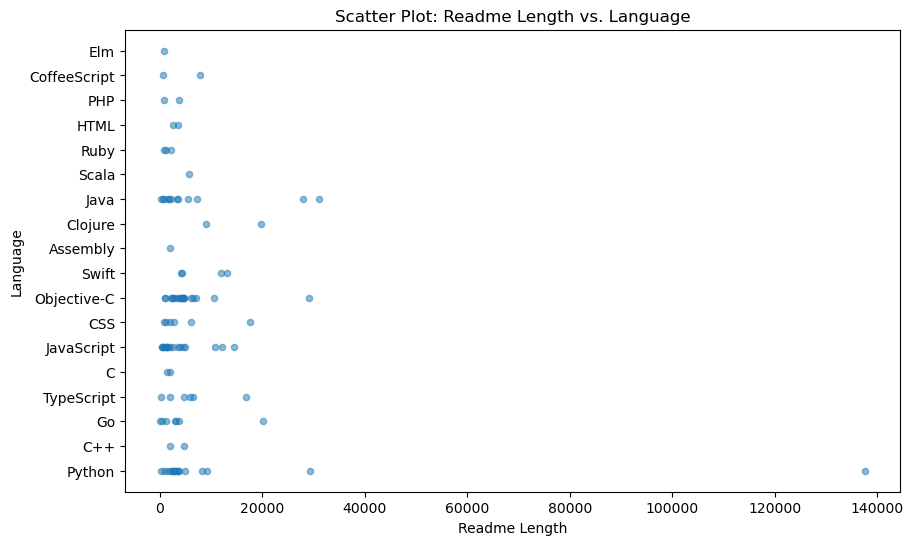

In [14]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['readme_length'], df['language'], s=20, alpha=0.5)

# Customize the plot
plt.title('Scatter Plot: Readme Length vs. Language')
plt.xlabel('Readme Length')
plt.ylabel('Language')

# Display the plot
plt.show()

